<a href="https://colab.research.google.com/github/SalgadoHUB/Classical_Mechanics_II/blob/main/Notebooks/fuente_termica_fotones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de una fuente térmica (caótica) de fotones

En este notebook se modela la **distribución de emisión de fotones** de una fuente **térmica o caótica**,
que presenta una **estadística super-Poissoniana**, es decir:

$$
\mathrm{Var}(n) > \langle n \rangle
$$

---

## Contexto físico

- **Luz coherente (láser):** distribución de Poisson  
  → Var(n) = ⟨n⟩  
- **Luz térmica (caótica):** distribución geométrica o *Bose–Einstein*  
  → Var(n) = ⟨n⟩ (1 + ⟨n⟩)  
- **Luz de un solo fotón (sub-Poisson):** Var(n) < ⟨n⟩  

---

## Distribución usada

La **distribución térmica de fotones** puede escribirse como:

$$
P(n) = \frac{\bar{n}^n}{(1+\bar{n})^{n+1}}
$$

para el caso de **modo único** (geométrica).

Si la luz tiene \( M \) modos independientes, se obtiene la **distribución binomial negativa**:

$$
P(n) = \binom{n+M-1}{n}
\left(\frac{\bar{n}/M}{1+\bar{n}/M}\right)^n
\left(\frac{1}{1+\bar{n}/M}\right)^M
$$

donde la varianza es:

$$
\mathrm{Var}(n) = \bar{n} + \frac{\bar{n}^2}{M}
$$

y el **factor de Fano**:

$$
F = \frac{\mathrm{Var}(n)}{\langle n \rangle} = 1 + \frac{\bar{n}}{M}
$$

## Configuración de la simulación

Vamos a simular una secuencia de **conteos de fotones** generados por una distribución
**binomial negativa** (o geométrica si \( M = 1 \)).

Los parámetros son:

- `n_promedio`: número promedio de fotones por bin temporal
- `M`: número de modos espaciales o temporales independientes
- `num_bins`: número de intervalos de tiempo simulados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Parámetros de la simulación
n_promedio = 1.0   # ⟨n⟩ esperado por bin temporal
M = 1               # número de modos (1 = modo único térmico)
num_bins = 1000     # número de intervalos de tiempo

# Conversión a parámetros de numpy.random.negative_binomial
r = M
p = r / (n_promedio + r) # <<-- mapeo para que la media empírica ≈ n_promedio

# Generación de fotones por bin
conteos = np.random.negative_binomial(r, p, size=num_bins)

# Cálculo de estadísticas
media = conteos.mean()
varianza = conteos.var(ddof=0)
fano = varianza / media

print(f"Parámetros de la simulación:")
print(f"  M = {M}")
print(f"  p = {p:.4f}")
print(f"  ⟨n⟩ teórico = {n_promedio}")
print()
print(f"Resultados simulados:")
print(f"  Media = {media:.3f}")
print(f"  Varianza = {varianza:.3f}")
print(f"  Factor de Fano = {fano:.3f}")

Parámetros de la simulación:
  M = 1
  p = 0.5000
  ⟨n⟩ teórico = 1.0

Resultados simulados:
  Media = 1.010
  Varianza = 2.022
  Factor de Fano = 2.002


## Visualización temporal

En esta gráfica se muestra el número de fotones detectados en cada bin temporal.  
La fluctuación visible es mayor que en una fuente de Poisson (coherente),
reflejando el carácter *super-Poissoniano* de la luz térmica.

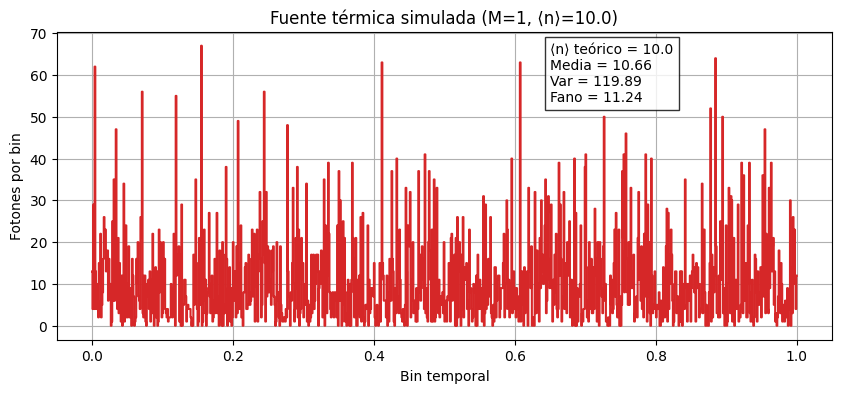

In [ ]:
tiempo = np.linspace(0, 1, num_bins)

plt.figure(figsize=(10, 4))
plt.plot(tiempo, conteos, drawstyle='steps-mid', color='tab:red')
plt.xlabel("Bin temporal")
plt.ylabel("Fotones por bin")
plt.title(f"Fuente térmica simulada (M={M}, ⟨n⟩={n_promedio})")

texto = (
    f"⟨n⟩ teórico = {n_promedio}\n"
    f"Media = {media:.2f}\n"
    f"Var = {varianza:.2f}\n"
    f"Fano = {fano:.2f}"
)
plt.text(0.65, 0.8 * max(conteos), texto,
         bbox=dict(facecolor='white', alpha=0.8))
plt.grid(True)
plt.show()


## Histograma de la distribución de fotones

La distribución de probabilidad de los fotones (conteos por bin)
debe seguir una **distribución binomial negativa**, que para \( M=1 \)
corresponde a la **geométrica** o de **Bose–Einstein**.

A diferencia de la distribución de Poisson, aquí los valores grandes de \( n \)
tienen una probabilidad significativamente mayor.

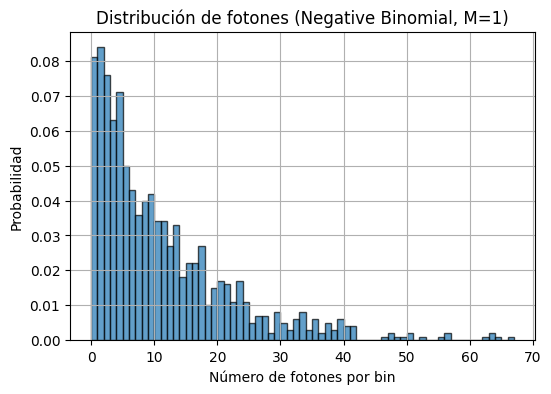

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(conteos, bins=range(0, max(conteos)+1), density=True, alpha=0.7, edgecolor='black')
plt.title(f"Distribución de fotones (Negative Binomial, M={M})")
plt.xlabel("Número de fotones por bin")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()

## Conclusión

- Para una fuente térmica **de un solo modo** (`M = 1`), la distribución se reduce a la **geométrica**, con varianza:

  $$
  \mathrm{Var}(n) = \bar{n}(1 + \bar{n})
  $$

  ⇒ **super-Poissoniana** (factor de Fano $  F = 1 + \bar{n} $ ).

- Para \( M > 1 \), la distribución se estrecha,
  y en el límite $ M \to \infty $ tiende a la **Poissoniana**.

- La función `np.random.negative_binomial()` en NumPy permite
  generar directamente estas estadísticas físicas realistas
  para fuentes de luz térmica o caótica.